In [1]:
import matplotlib
from matplotlib.mlab import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy
from collections import Counter
%matplotlib inline  
DEFAULT_DPI = 600
matplotlib.rcParams['figure.figsize'] = (15, 8)

from sklearn import linear_model
import numpy.ma as ma

## Input some data and run correlations
Заменим значение в 623 строке с nan на 0

In [2]:
#dataset1
ncols=18
data = pd.read_csv('dataset_16.dms', header=None, sep='\t', na_values='-', dtype={11: 'category'})
data[11] = data[11].cat.codes.astype(int)
data.loc[623, 17] = 0

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,1,10.0,43,5825543,69,60,0,1407606829,0,-24,0,0,1414776005,NaN,424668,NaN,3.0
1,2,1,334.0,129,31,112227,2,1,1415699671,0,-29,2,0,1386786500,86401.0,1274004,1.415715e+09,21.0
2,2,1,1.0,5,5825543,315,25219,1,1415428541,0,-26,2,0,1415612168,NaN,49380,NaN,16.0
3,1,1,422.0,2,5825543,392,44,1,1411245251,0,22,0,0,1379156172,NaN,19752,NaN,20.0
4,1,1,0.0,580,7699829,500,161068,1,1354122839,0,26,0,0,1415715882,3.0,5728080,1.415716e+09,18.0


## Удаление столбцов 
удалим константный столбец (1) и столбцы с слишком большим количеством пропусков (14, 16)

In [4]:
for i in range(ncols):
    if data[i].min()==data[i].max():
        print(i, "const")
    print('number of - in ', i,'row', data[i].isnull().sum())   
    

number of - in  0 row 0
1 const
number of - in  1 row 0
number of - in  2 row 33
number of - in  3 row 0
number of - in  4 row 0
number of - in  5 row 0
number of - in  6 row 0
number of - in  7 row 0
number of - in  8 row 0
number of - in  9 row 0
number of - in  10 row 0
number of - in  11 row 0
number of - in  12 row 0
number of - in  13 row 0
number of - in  14 row 584
number of - in  15 row 0
number of - in  16 row 783
number of - in  17 row 0


In [5]:
for i in range(ncols):
    unique, counts = np.unique(np.array(data[i], dtype=np.str), return_counts=True)
    if len(unique) <= 10:
        print('In ', i, ' only this item: ', unique, counts)


In  0  only this item:  ['1' '2' '3' '4' '5' '6' '7'] [151 157 120 138 141 135 158]
In  1  only this item:  ['1'] [1000]
In  7  only this item:  ['0' '1'] [  1 999]
In  9  only this item:  ['0' '1' '3' '5' '61' '7' '83'] [986   8   1   1   1   2   1]
In  11  only this item:  ['0' '1' '2' '3' '4' '5' '6'] [151 120 157 135 158 138 141]
In  12  only this item:  ['0' '1'] [989  11]


Удалим их и 7, 12 -- потому что в 7 и 12 колонке схожие элементы

In [6]:
data.drop([1, 7, 12, 14, 16], axis=1, inplace=True)

### Посмотрим на скоррелированость слобцов

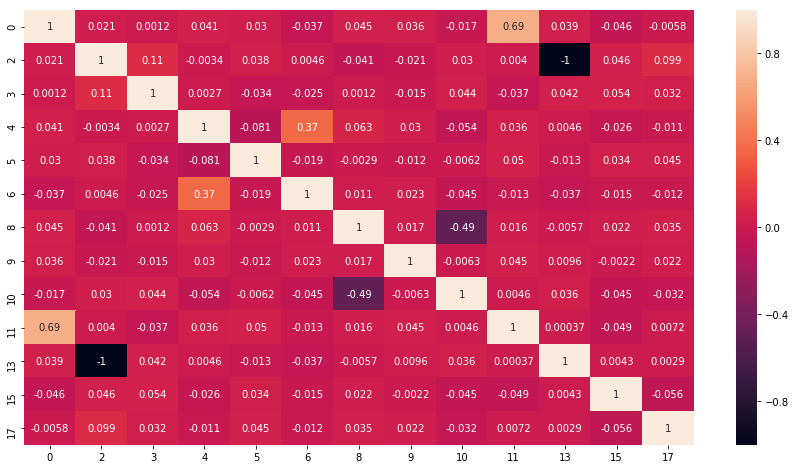

In [7]:
sns.heatmap(data.corr(), annot=True);

Видно, что 0 и 11 также как 2 и 13 скоррелированы. Значит можем удалить их

In [8]:
data.drop([11, 13], axis=1, inplace=True)

Посмотрим на то, что мы знаем про данные:

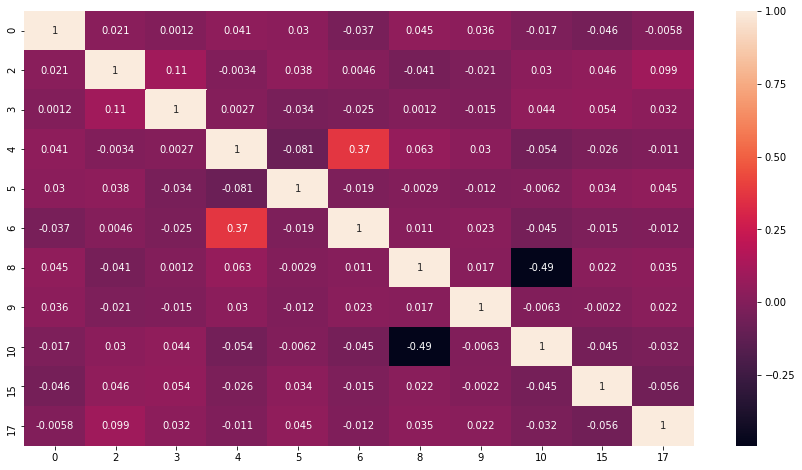

In [9]:
sns.heatmap(data.corr(), annot=True)

In [10]:
data.describe(include='all')

,0,2,3,4,5,6,8,9,10,15,17
count,1000.000000,967.000000,1000.000000,1.000000e+03,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,3.998000,114.802482,57.329000,2.554041e+06,22413.136000,1.775337e+05,1.397660e+09,0.174000,5.785000,1.980401e+06,13.710000
std,2.052854,214.396662,167.270135,3.007527e+06,52024.852392,3.938943e+05,2.574589e+07,3.275737,22.871333,4.478099e+07,7.576761
min,1.000000,0.000000,1.000000,3.000000e+00,1.000000,1.000000e+00,1.240921e+09,0.000000,-29.000000,9.876000e+03,0.000000
25%,2.000000,0.000000,1.000000,4.862525e+04,285.750000,1.475000e+01,1.390472e+09,0.000000,-20.000000,9.876000e+03,8.000000
50%,4.000000,7.000000,5.000000,6.236180e+05,459.500000,6.400000e+02,1.409275e+09,0.000000,21.000000,4.938000e+04,16.000000
75%,6.000000,132.000000,32.000000,5.825543e+06,8010.000000,5.009925e+04,1.414825e+09,0.000000,26.000000,3.160320e+05,20.000000
max,7.000000,1706.000000,2086.000000,7.699829e+06,366755.000000,1.366483e+06,1.415738e+09,83.000000,26.000000,1.415701e+09,23.000000


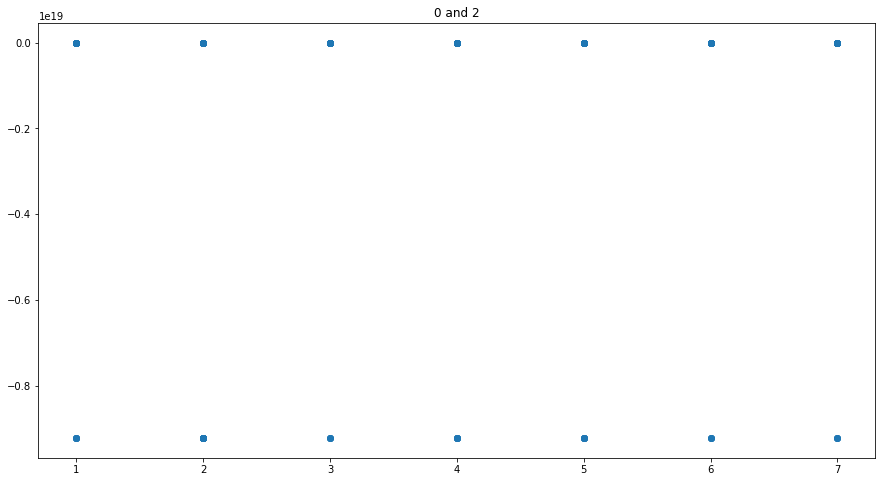

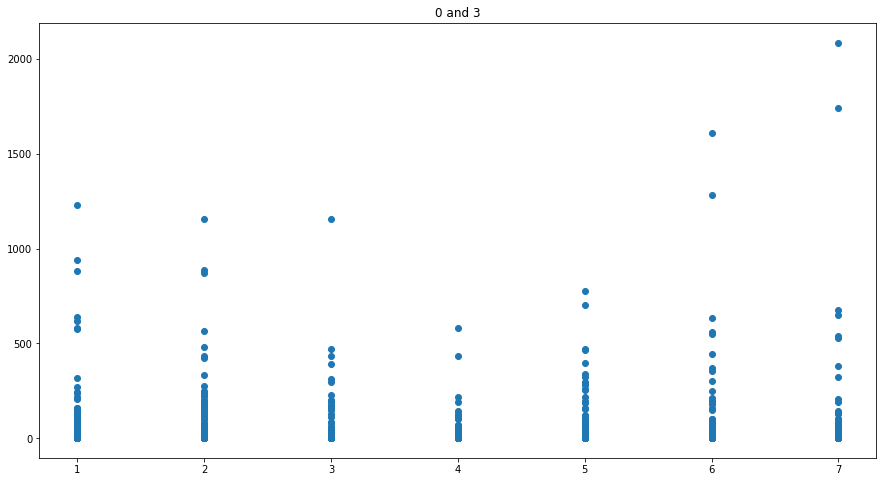

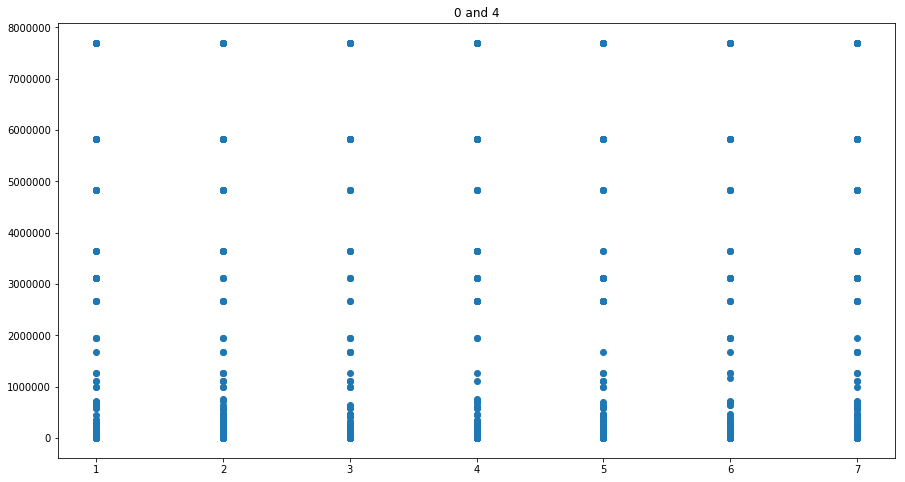

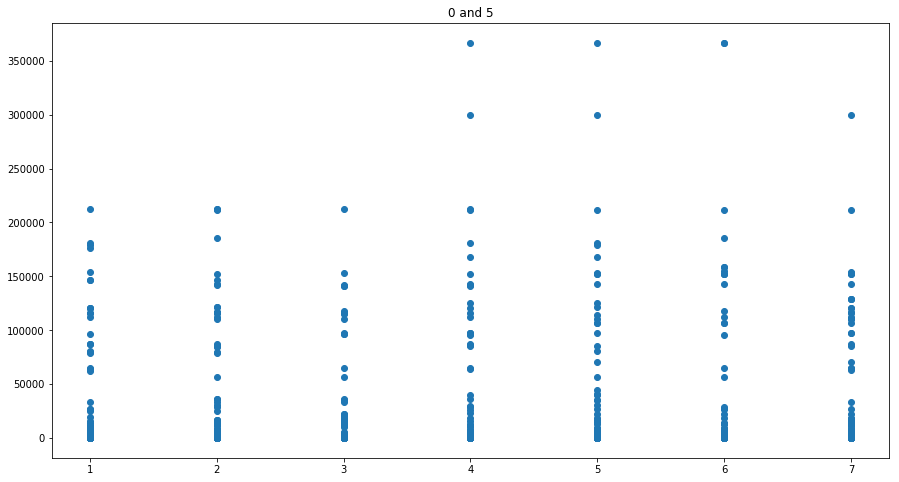

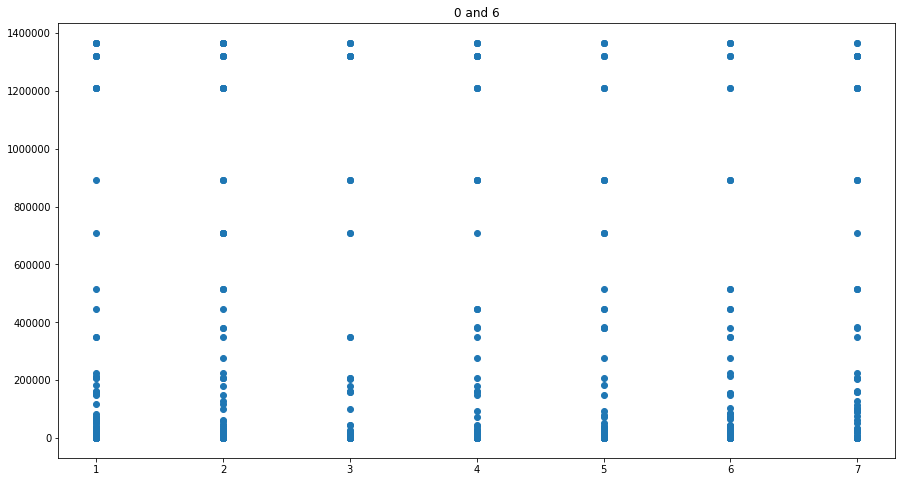

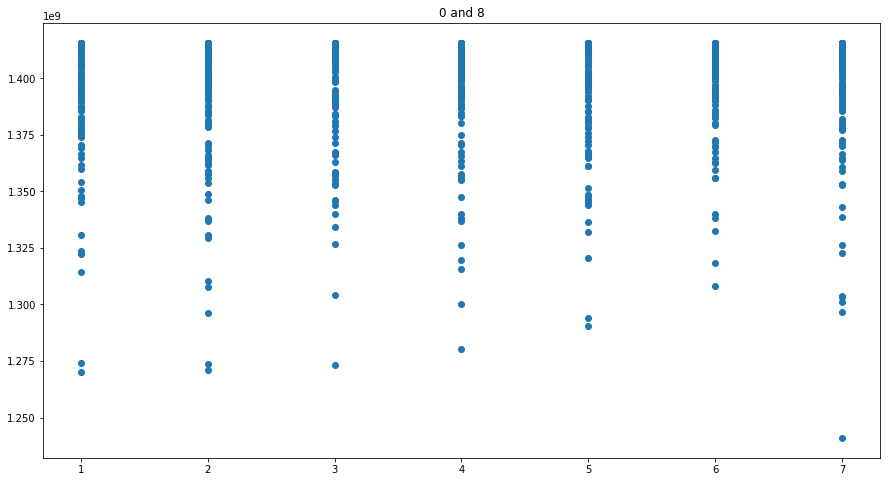

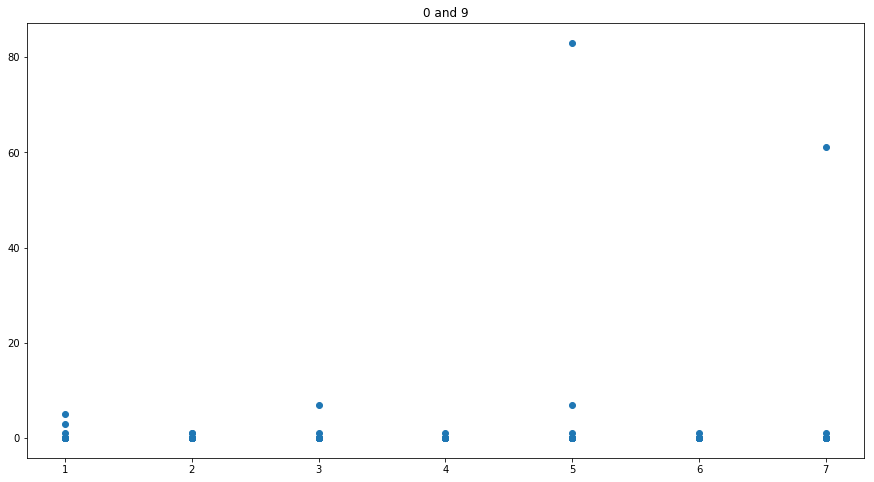

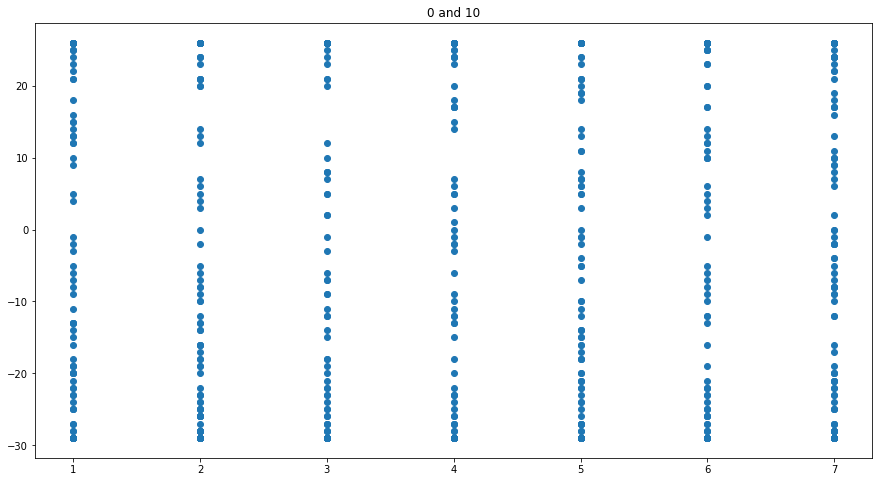

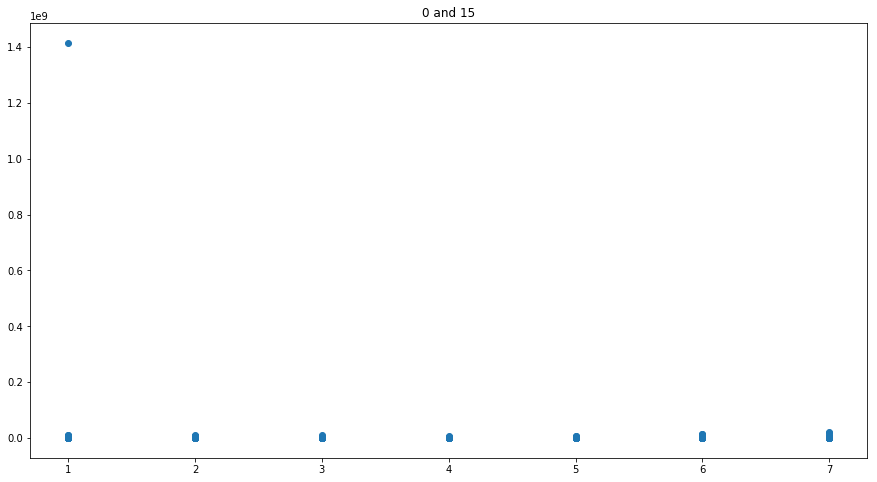

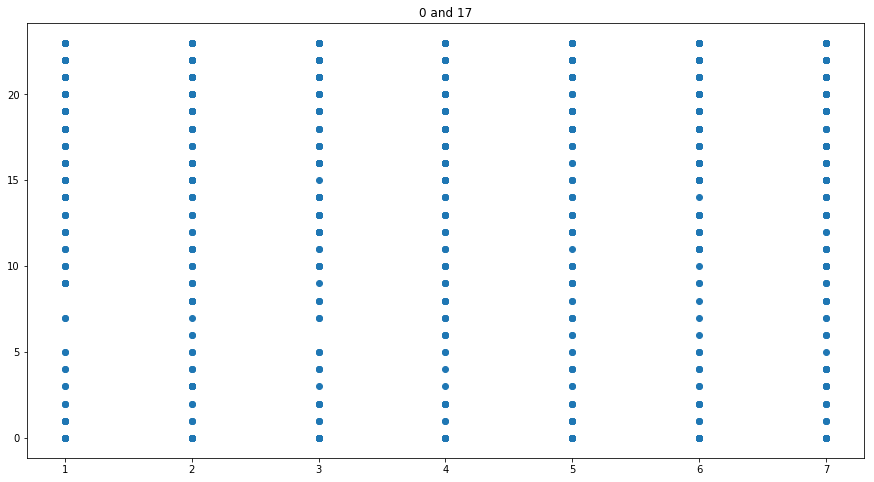

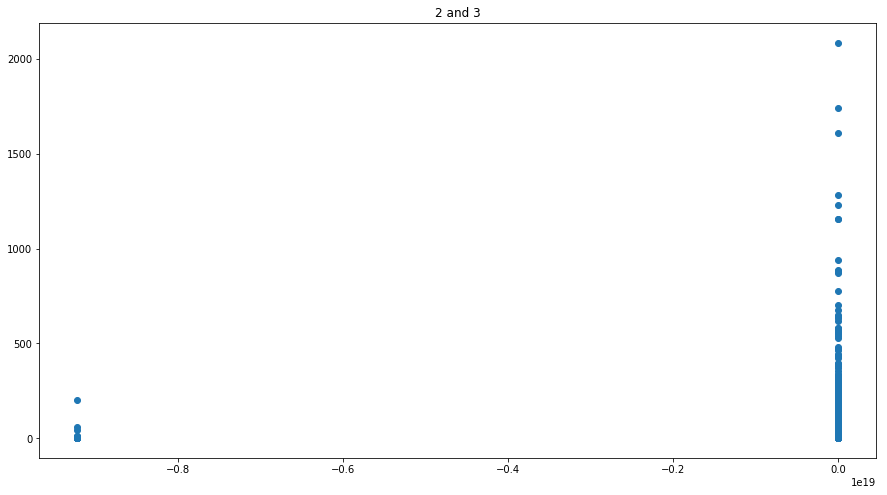

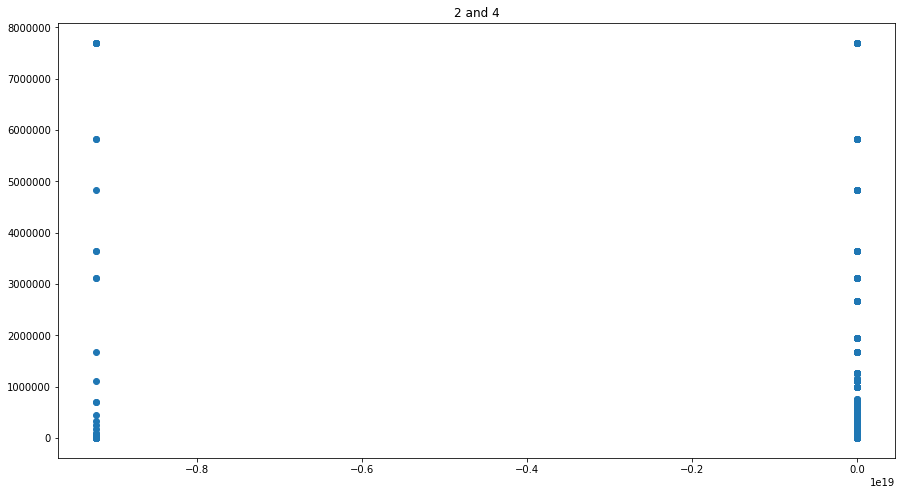

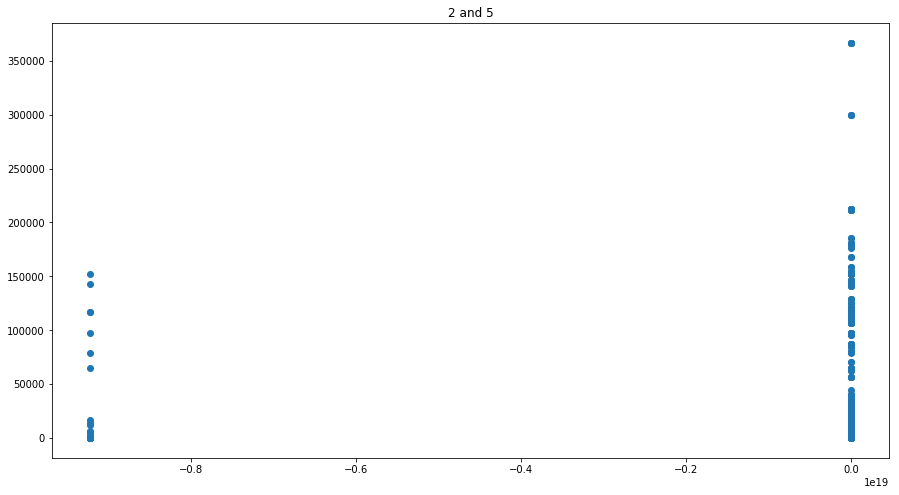

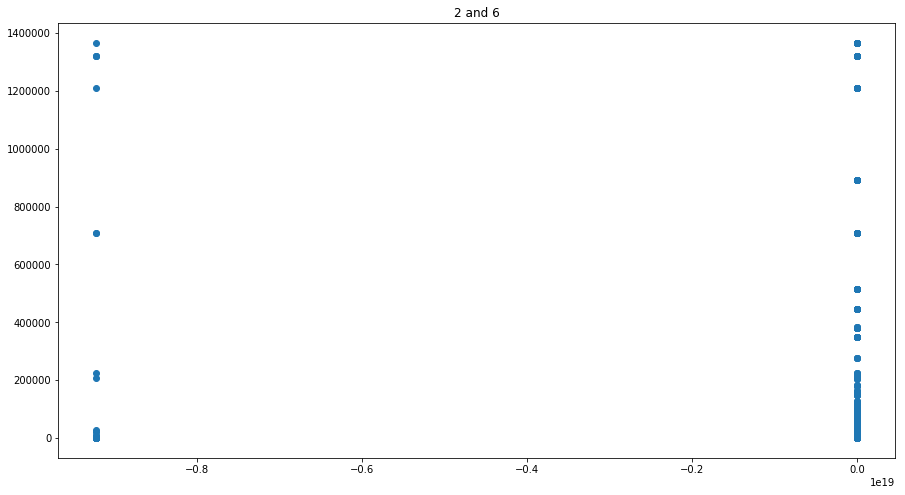

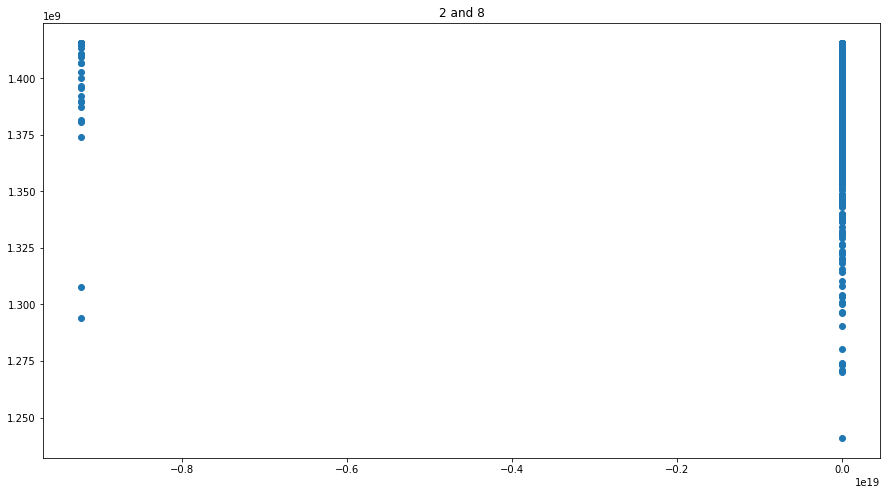

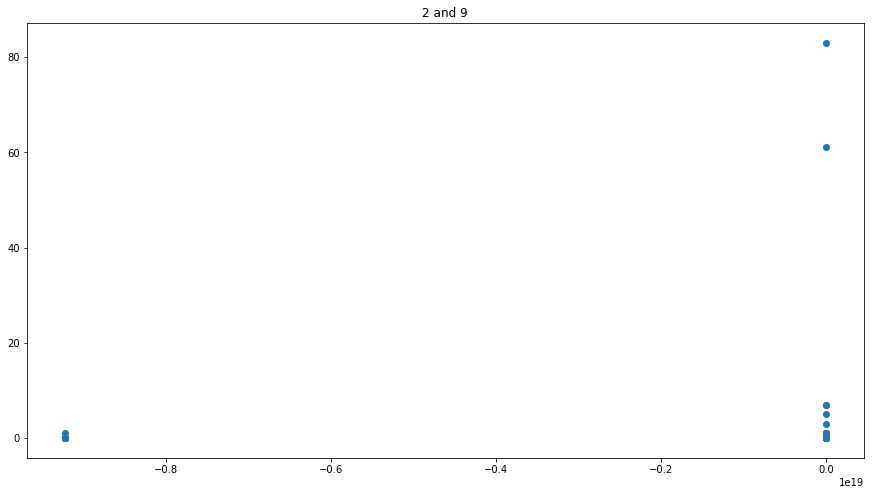

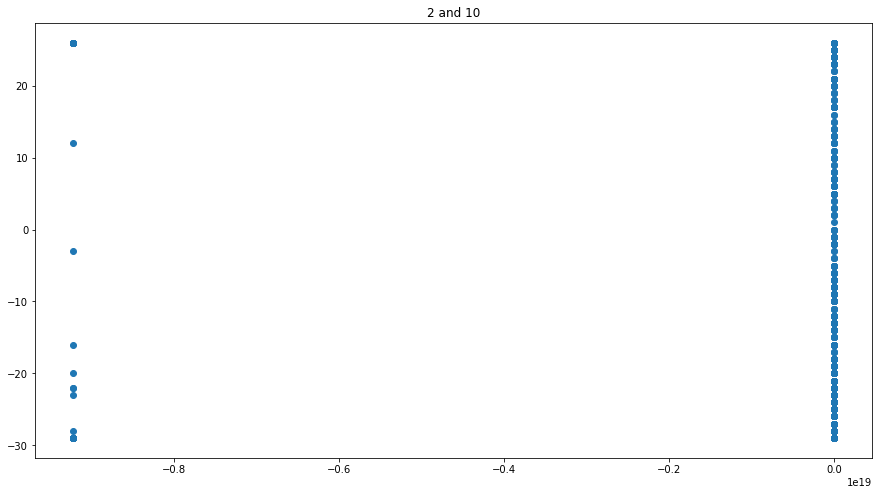

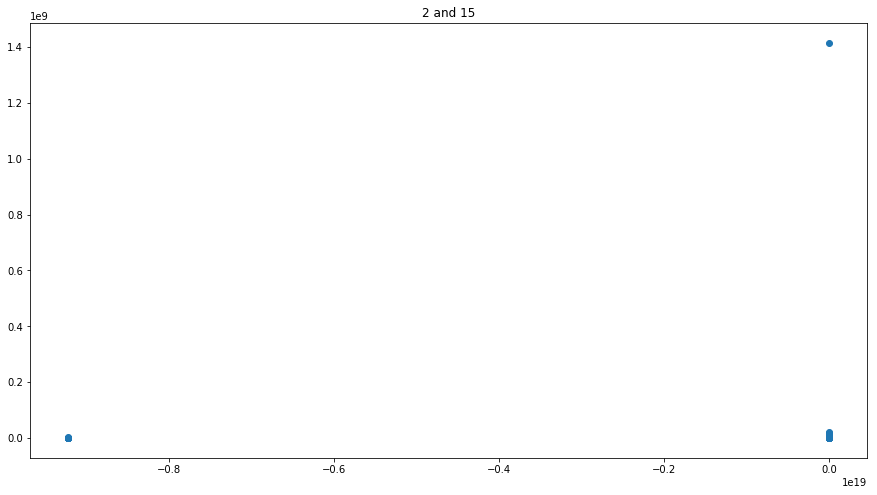

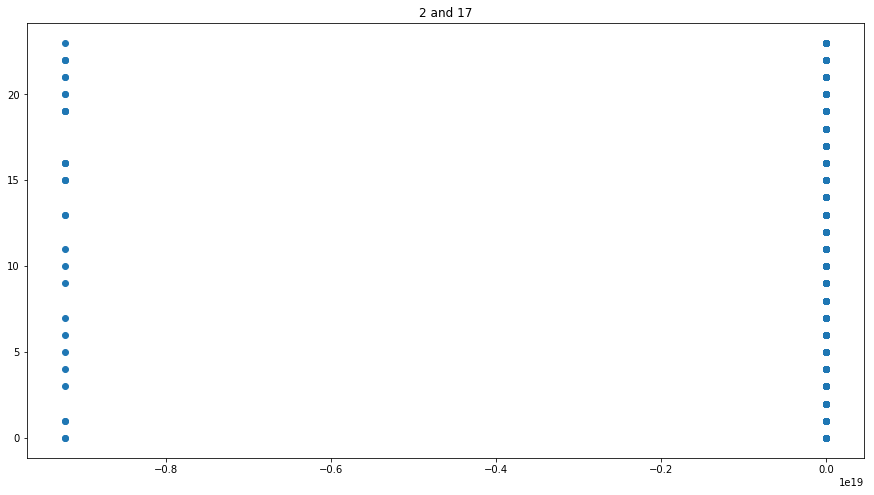

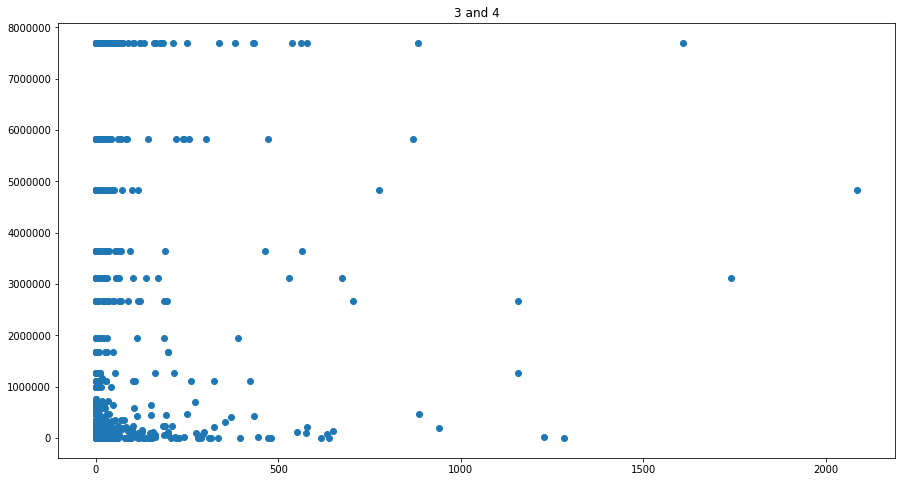

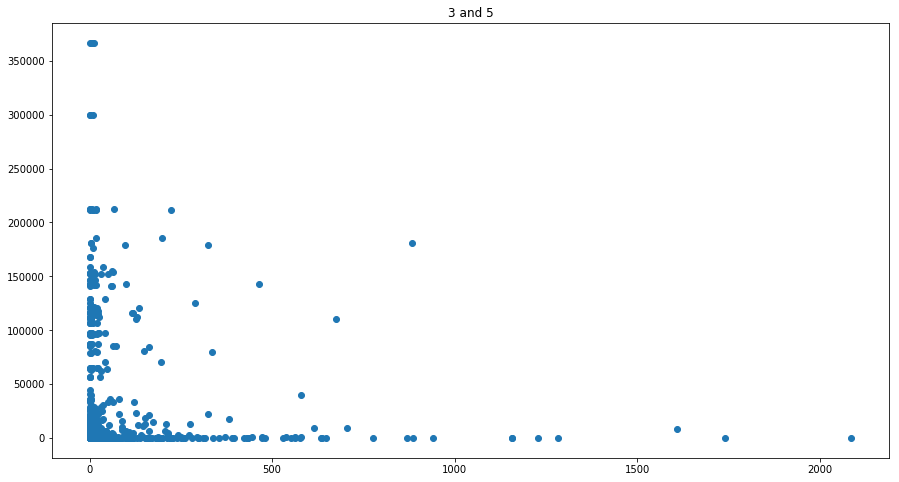

In [ ]:
for i in range(ncols):
    for j in range(i + 1, ncols):
        try:
            plt.title(str(i) + ' and ' + str(j))
            plt.plot(np.array(data[i], dtype=np.int), np.array(data[j], dtype=np.int), 'o')
            plt.show()
        except Exception:
            print()

Видно, что 3 сильно скоррелирована с 6, 8 и 10
Также 8 скоррелирована с 5, 6, 10 -- подробние рассмотрим корреляцию

Можно это запомнить для PCA

## Run PCA to see if we can exclude some cols

Необходимо сделать нормализацию

In [ ]:
pca1 = PCA(data.fillna(0), standardize=True)
print("Explained variance")
for d in pca1.fracs:
    print(d)

In [ ]:
# first eigenvector
print("Correlation")
pd.DataFrame(pca1.Wt.T)

Рассмторим первые семь векторов, так как они дают дисперсию > 0.85
Оставим 4, 6, 8, 10, 12, 13

In [156]:
data[[0, 2, 4, 6, 8, 10, 15]]. head()

,0,2,4,6,8,10,15
0,1,10.0,5825543,60,1407606829,-24,424668
1,2,334.0,31,2,1415699671,-29,1274004
2,2,1.0,5825543,25219,1415428541,-26,49380
3,1,422.0,5825543,44,1411245251,22,19752
4,1,0.0,7699829,161068,1354122839,26,5728080


In [ ]:
data[[0, 2, 4, 6, 8, 10, 15]]
df.to_hdf('d_16.h5', 'df', mode='w', format='t', complevel=9)